C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_4348\1103050016.py:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix, 'average')


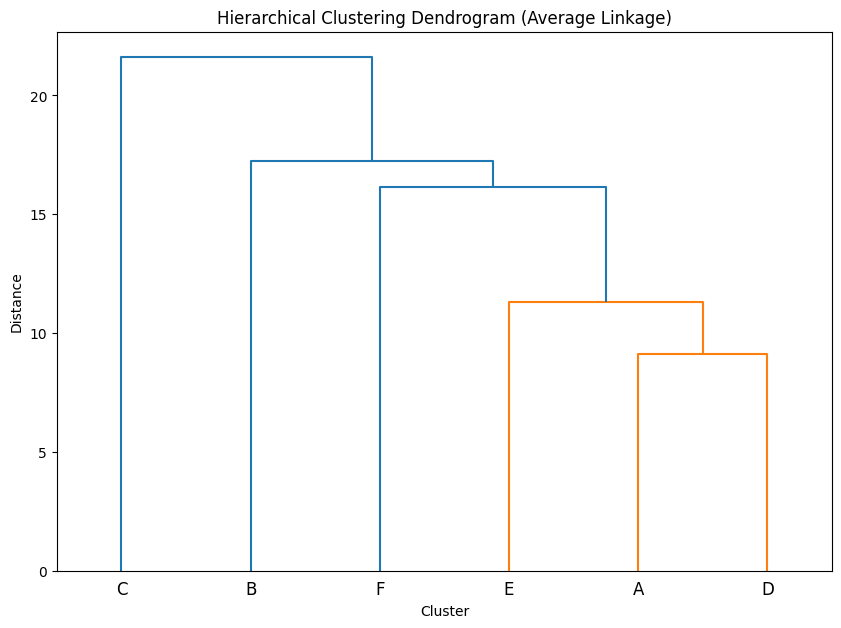

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 给定距离矩阵
dist_matrix = np.array([
    [0, 12, 6, 2, 3, 1],
    [12, 0, 8, 7, 6, 8],
    [6, 8, 0, 9, 2, 20],
    [2, 7, 9, 0, 7, 6],
    [3, 6, 2, 7, 0, 2],
    [1, 8, 20, 6, 2, 0]
])

# 使用scipy的linkage方法进行层次聚类，这里使用平均链接法
Z = linkage(dist_matrix, 'average')

# 绘制树状图
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=['A', 'B', 'C', 'D', 'E', 'F'])
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Cluster')
plt.ylabel('Distance')
plt.show()


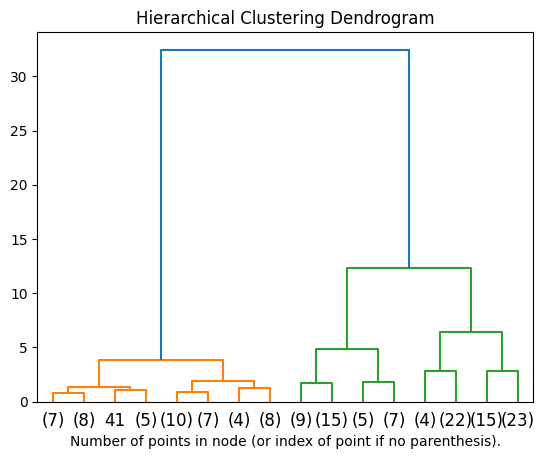

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()